# Introduction

Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans.

The company uses of a variety of alternative data - including telco and transactional information - to predict their clients' repayment abilities.

The goal of this competition is to help them unlock the full potential of their data.

# Load the data

You can download the data from Kaggle:https://www.kaggle.com/c/home-credit-default-risk

In [589]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scs

%matplotlib inline
plt.style.use('ggplot') # Choice of style 'ggplot' 

# Make plot for retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') 

In [590]:
pd.set_option("display.max_colwidth",999)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

Helper function ```col_name(name, df_description)```--> gives description of the column name defined in the table HomeCredit_columns_description.csv

In [591]:
col_description = pd.read_csv('data/HomeCredit_columns_description.csv',
                              index_col=0,encoding='cp1252')

def col_name(name, col_description=col_description):
    values = col_description[col_description['Row'] == name]['Description'].values
    print(name + ': \n')
    for i in values:
        print (i+'\n')
    table = col_description[col_description['Row'] == name]['Table'].values
    print('Table: {}\n'.format(table))

In [592]:
def plot_data(col_name, df, numeric=True):
    if numeric:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
        sns.boxplot(df[col_name], ax=ax1);
        sns.distplot(df[col_name].dropna(), ax=ax2);
        plt.show();
    else:
        plt.figure(figsize=(10,4))
        sns.countplot(x=col_name, data=df, orient='h',
                      order = df[col_name].value_counts().index, alpha=.7)
        plt.show()

In [593]:
application_train = pd.read_csv('data/application_train.csv.zip') 
application_test = pd.read_csv('data/application_test.csv.zip') 

- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
- Static data for all applications. One row represents one loan in our data sample.
- This week we'll be mainly focused on this table.

In [594]:
print("application_train -  rows:",application_train.shape[0]," columns:", application_train.shape[1])
print("application_test -  rows:",application_test.shape[0]," columns:", application_test.shape[1])

application_train -  rows: 307511  columns: 122
application_test -  rows: 48744  columns: 121


In [595]:
application_train.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [596]:
# checking missing data
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)


,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


## TARGET 

In [597]:
col_name('TARGET')

TARGET: 

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Table: ['application_{train|test}.csv']



In [598]:
pct = application_train["TARGET"].value_counts(1)
cnt = application_train["TARGET"].value_counts()
cnt_table = pd.concat([pct, cnt], axis=1, keys=['Percent', 'Total'])
cnt_table

,Percent,Total
0,0.919271,282686
1,0.080729,24825


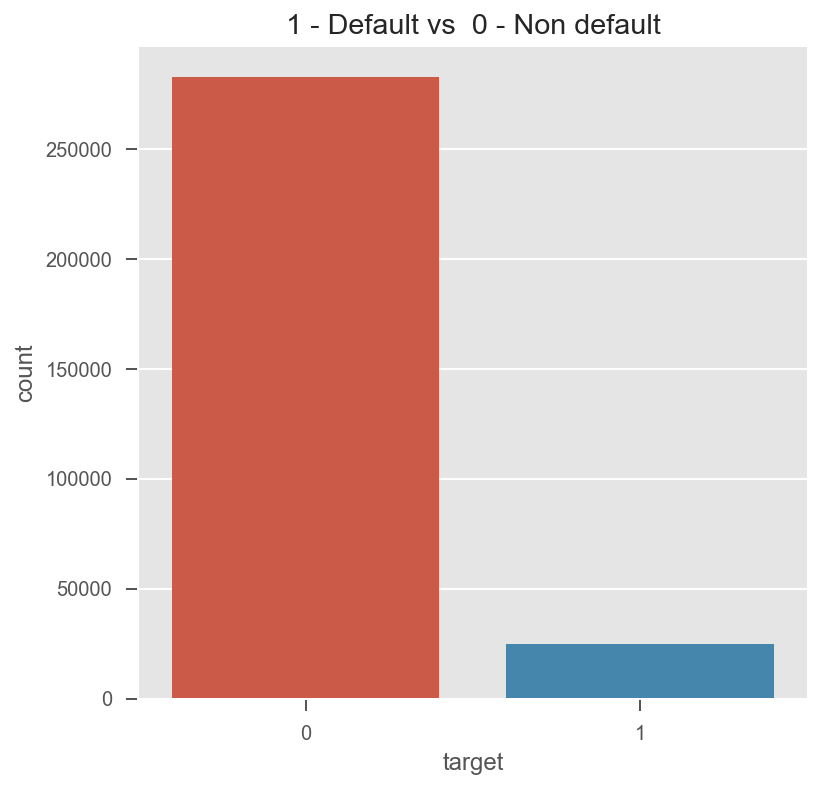

In [599]:
target = application_train["TARGET"].value_counts()
df = pd.DataFrame({'target': target.index,
                   'count': target.values
                  })
plt.figure(figsize = (6,6))
plt.title('1 - Default vs  0 - Non default')
sns.barplot(x = 'target', y="count", data=df);

From this information, we can see that the target are very imbalanced. There are far more loans that were repaid on time than loans that were not repaid. 

## Correlation

We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method. It does give us an idea of possible relationships within the data.

In [600]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()

In [601]:
nb = 4
corr_table = pd.DataFrame({'Most positive corr column':correlations.tail(nb).index,
                           'Most positive corr value':correlations.tail(nb).values,
                           'Most negative corr column': correlations.head(nb).index,
                           'Most negative corr value': correlations.head(nb).values})
corr_table

,Most negative corr column,Most negative corr value,Most positive corr column,Most positive corr value
0,EXT_SOURCE_3,-0.178919,REGION_RATING_CLIENT,0.058899
1,EXT_SOURCE_2,-0.160472,REGION_RATING_CLIENT_W_CITY,0.060893
2,EXT_SOURCE_1,-0.155317,DAYS_BIRTH,0.078239
3,DAYS_EMPLOYED,-0.044932,TARGET,1.000000


## Scatter Matrix

In [602]:
corr_series = pd.concat([corr_table['Most positive corr column'],
                         corr_table['Most negative corr column']], ignore_index=True)
corr_series

0           REGION_RATING_CLIENT
1    REGION_RATING_CLIENT_W_CITY
2                     DAYS_BIRTH
3                         TARGET
4                   EXT_SOURCE_3
5                   EXT_SOURCE_2
6                   EXT_SOURCE_1
7                  DAYS_EMPLOYED
dtype: object

Randomly sample 1000 rows to build up the scatter matrix.

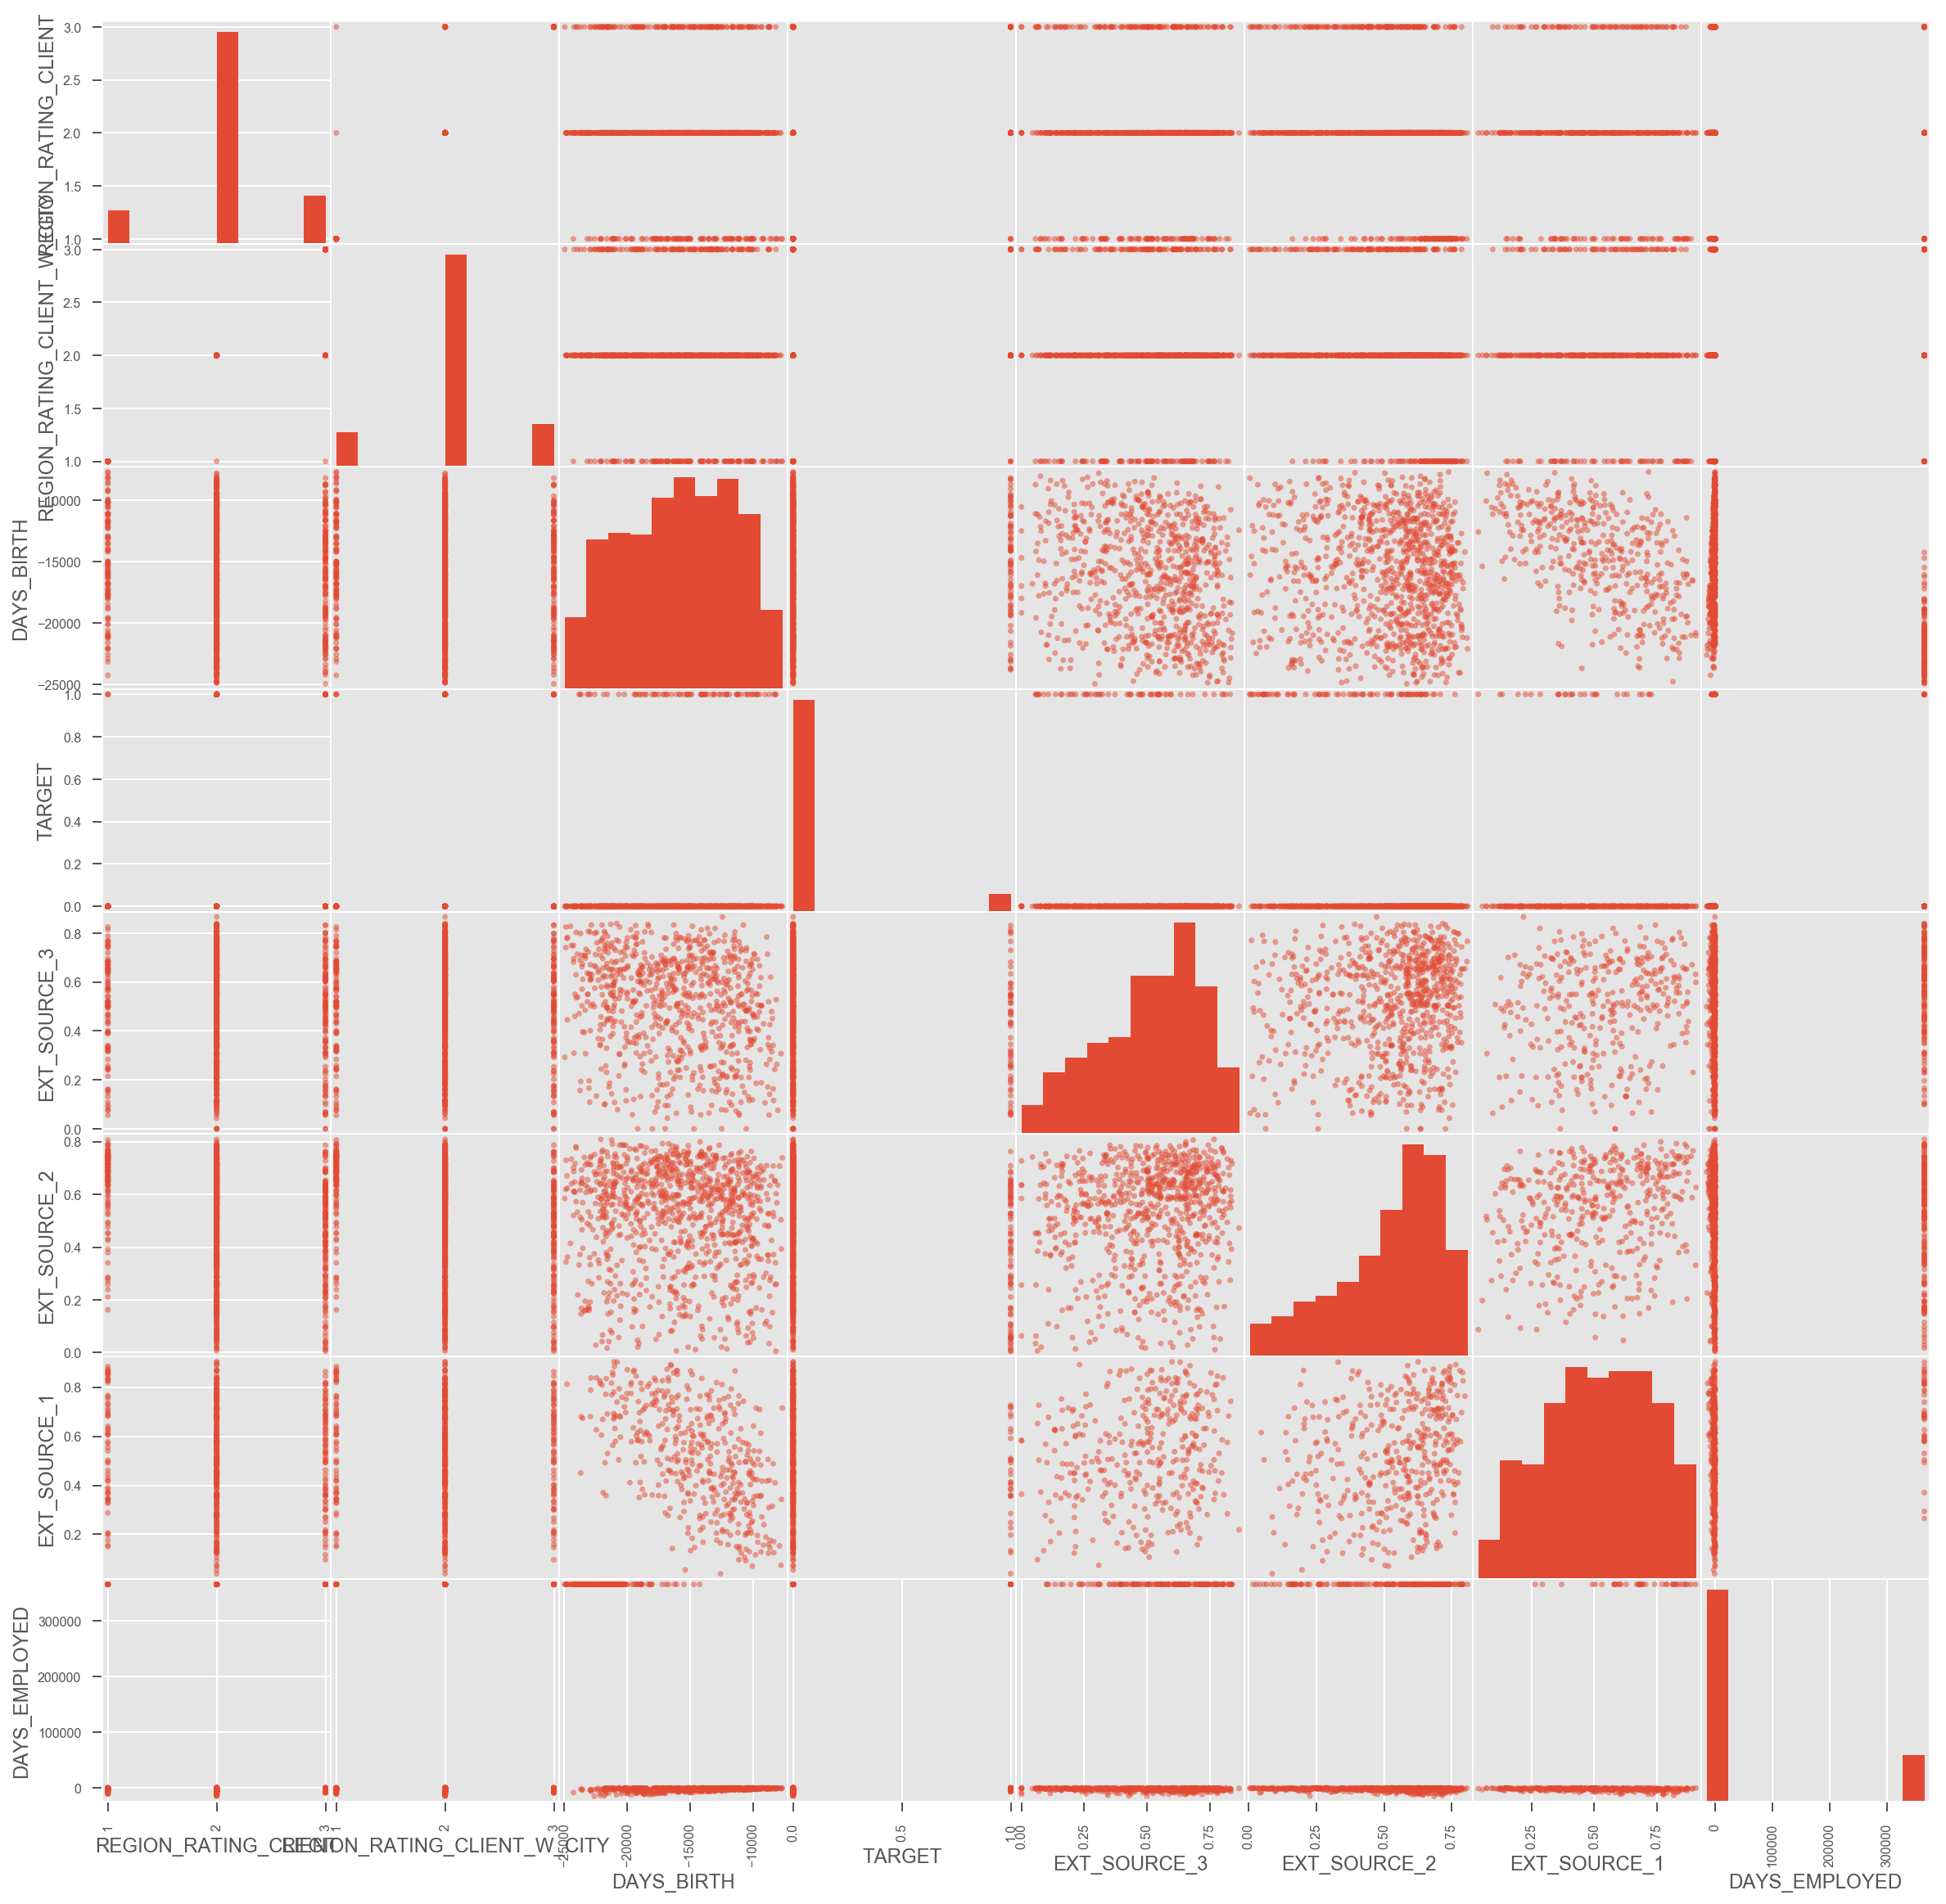

In [603]:
pd.plotting.scatter_matrix(application_train.sample(1000).loc[:,corr_series.values],
                           figsize=(20,20));

Using eyeballing method we can see some interesting **interaction** between variable:

- TARGET AND DAYS_BIRTH
- TARGET AND EXT_SOURCE_1 OR 2 OR 3
- DAYS_BIRTH and EXT_SOURCE_1
- DAYS_BIRTH and DAYS_EMPLOYED
- EXT_SOURCE_2 AND REGION_RATING_CLIENT
- etc ... 

Let's first focus on these features to analyse one by one.

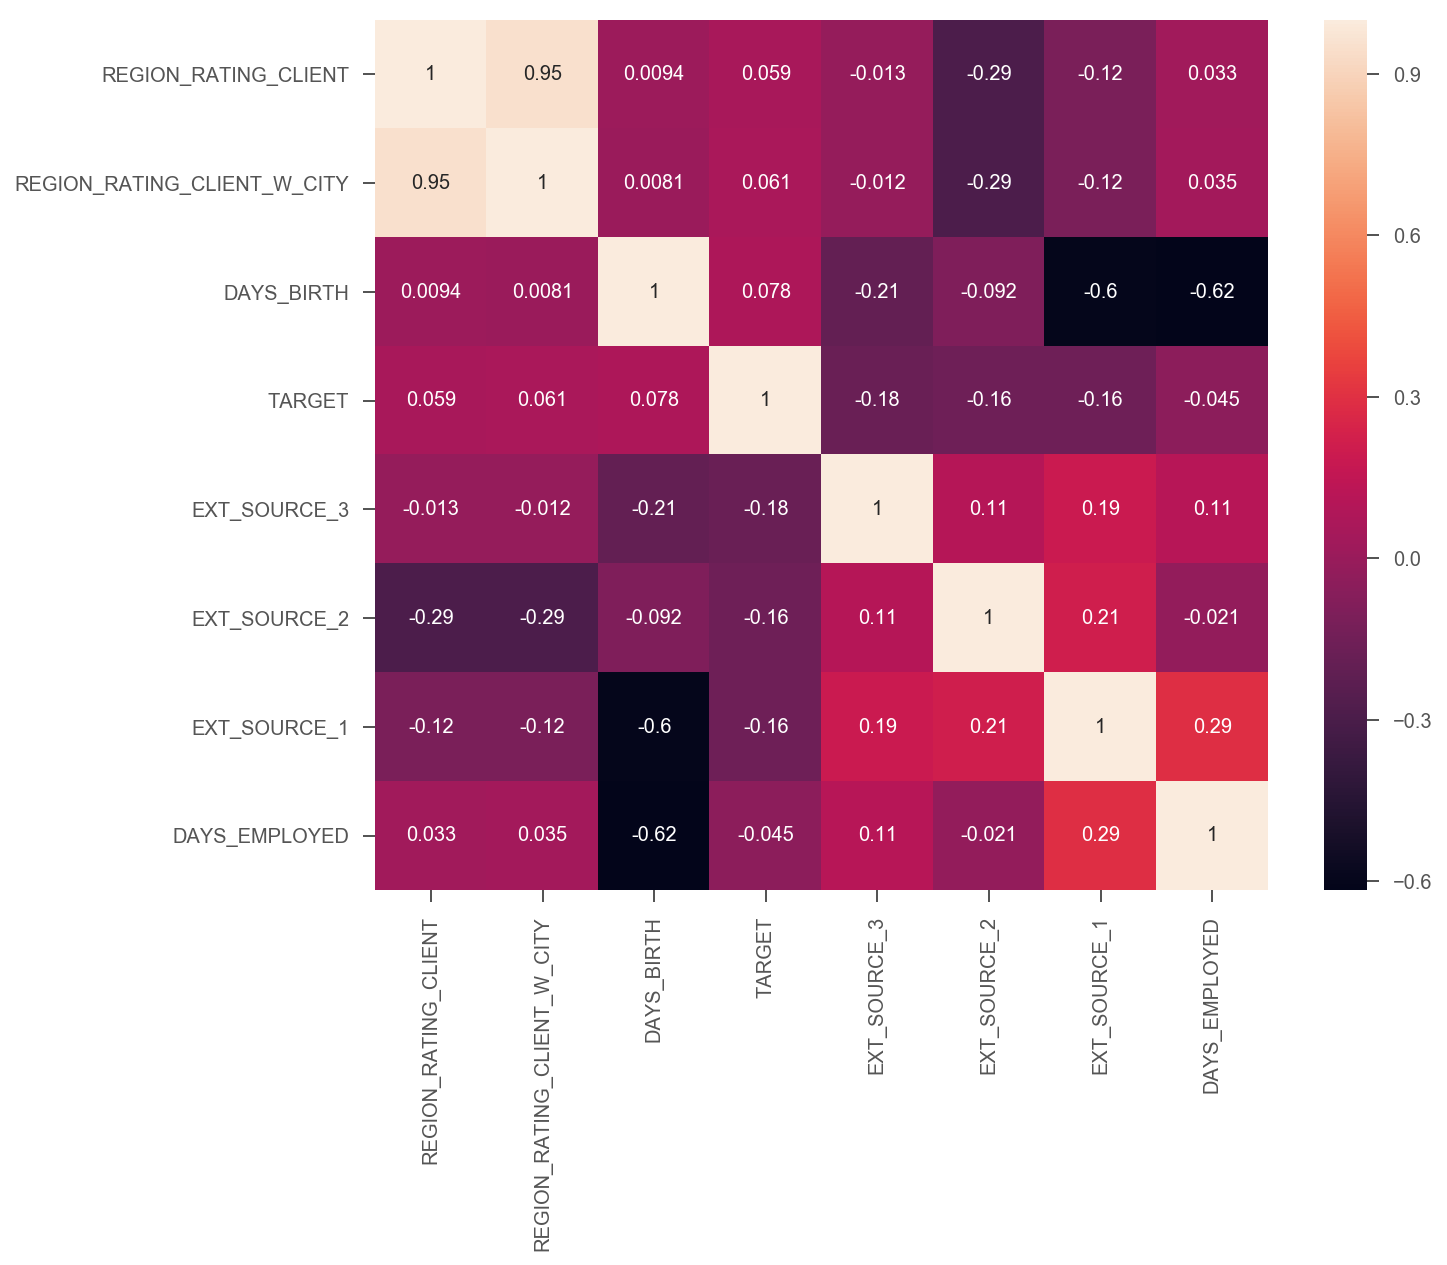

In [604]:
df_corr = application_train[corr_series].corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True);

## DAYS_BIRTH

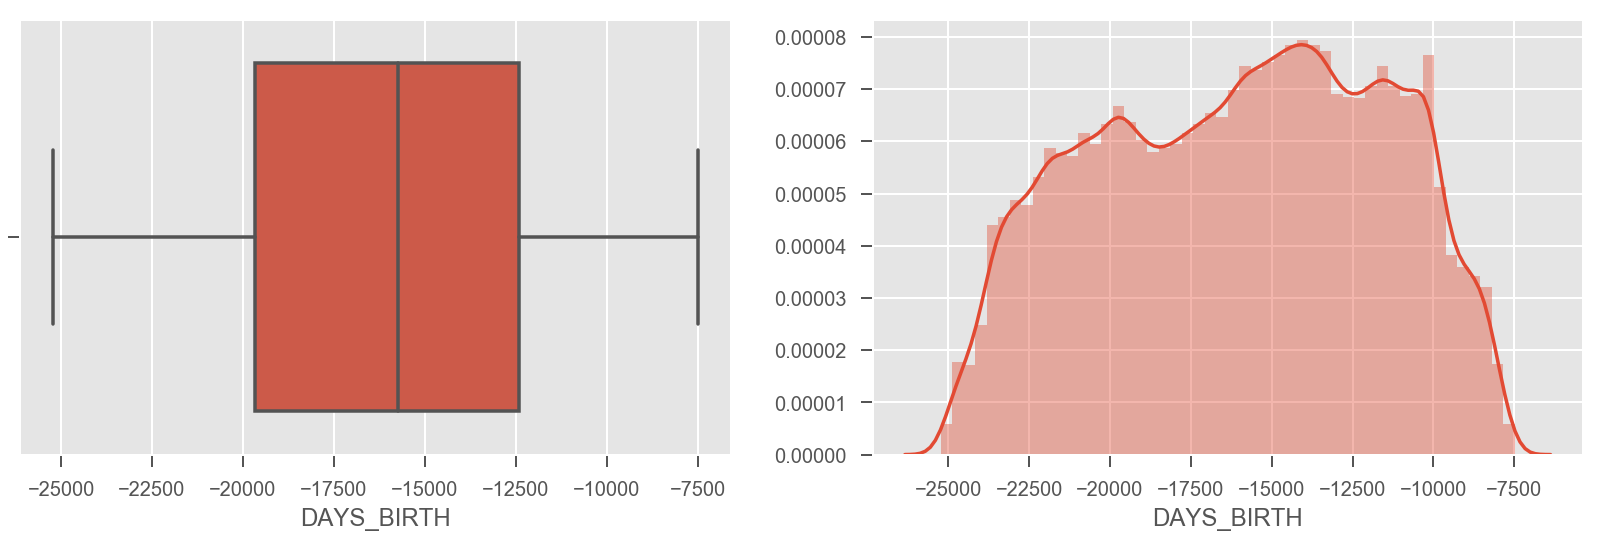

In [605]:
plot_data("DAYS_BIRTH", application_train)

In [606]:
col_name("DAYS_BIRTH")

DAYS_BIRTH: 

Client's age in days at the time of application

Table: ['application_{train|test}.csv']



- For some unknown reason, DAYS_BIRTH is recorded by days and in negative value.
- Need to transform them to normal birth date.

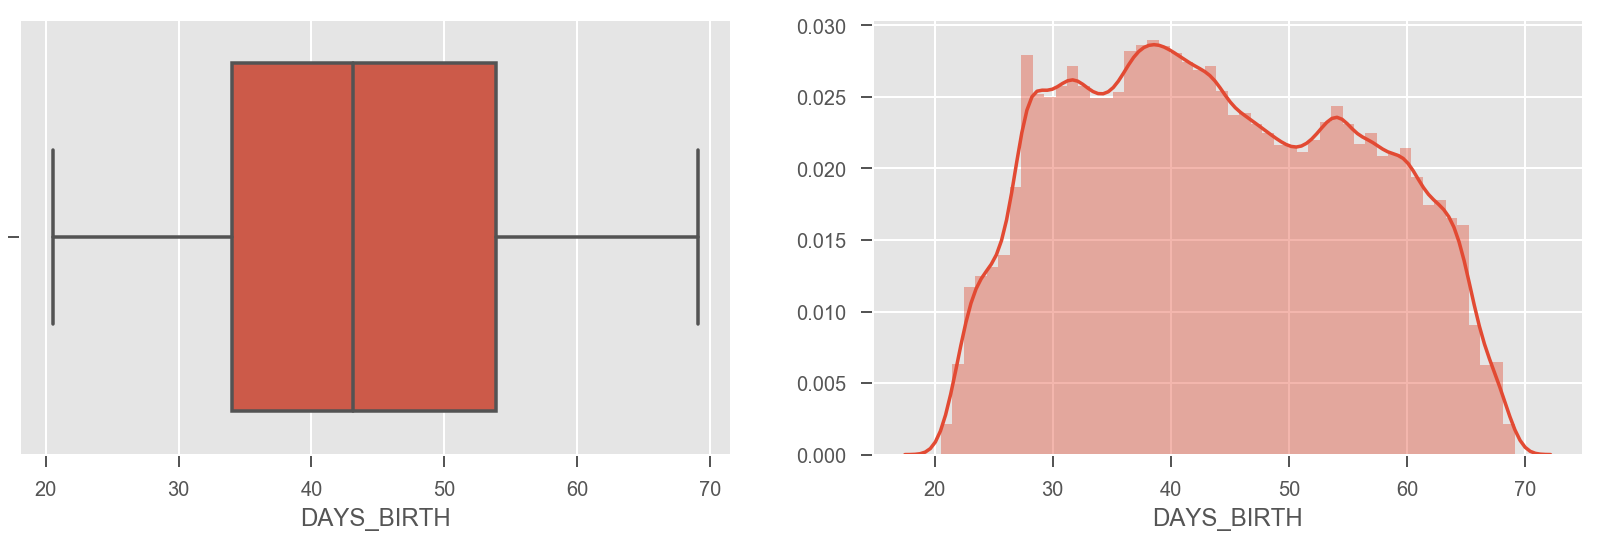

In [607]:
application_train["DAYS_BIRTH"] = application_train["DAYS_BIRTH"]/-365
plot_data("DAYS_BIRTH", application_train)

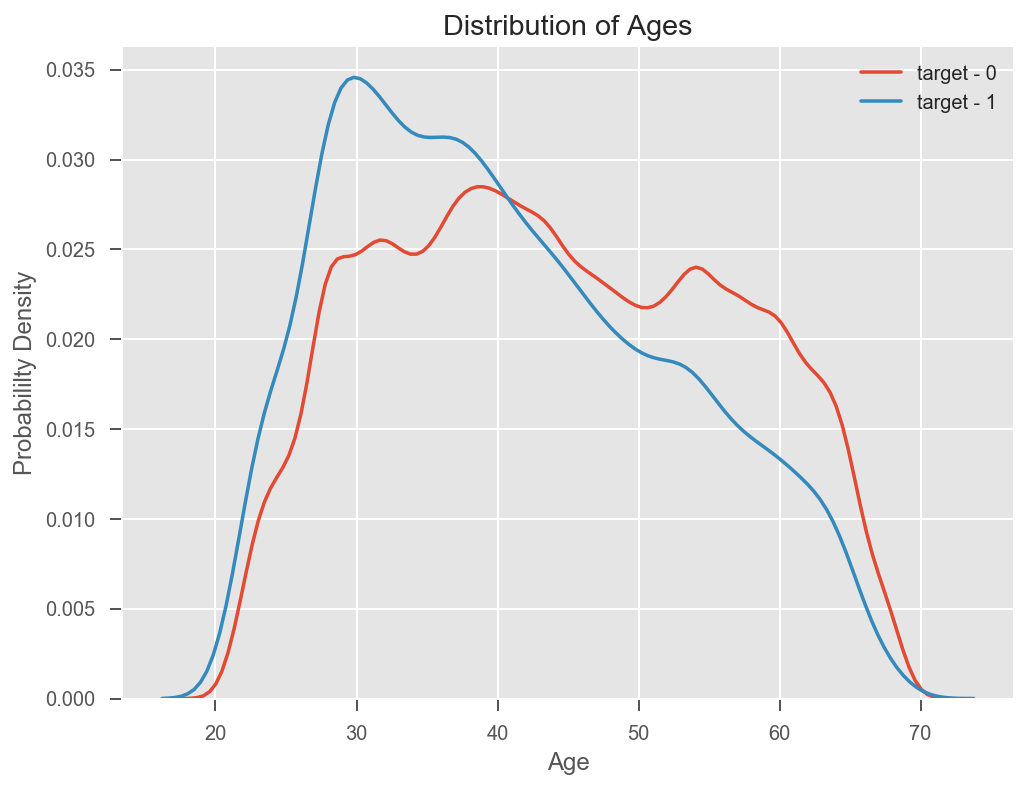

In [608]:
plt.figure(figsize = (8, 6))

sns.distplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'],
             label='target - 0', hist=False)
sns.distplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'],
             label = 'target - 1', hist=False)

plt.legend()
plt.xlabel('Age');
plt.ylabel('Probabililty Density');
plt.title('Distribution of Ages');

It seems the older we are getting, the less likely we default on loans.

### REGION_RATING_CLIENT_W_CITY

In [609]:
col_name("REGION_RATING_CLIENT_W_CITY")

REGION_RATING_CLIENT_W_CITY: 

Our rating of the region where client lives with taking city into account (1,2,3)

Table: ['application_{train|test}.csv']



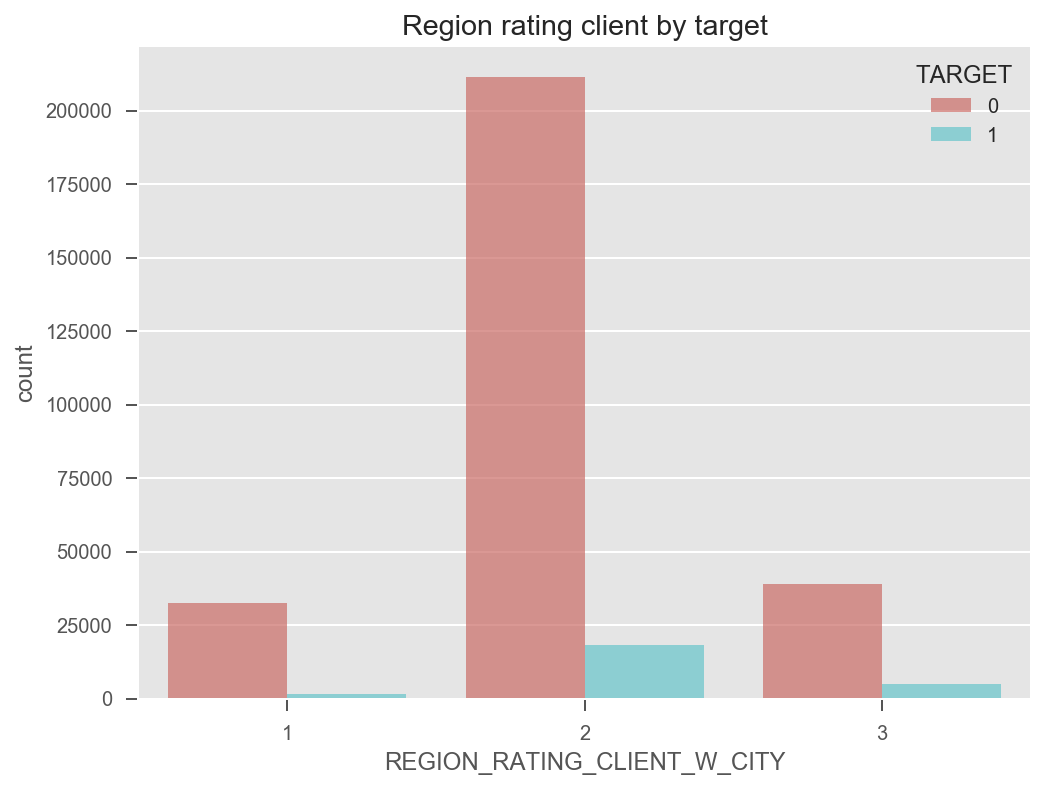

In [610]:
plt.figure(figsize=(8,6))
sns.countplot(x="REGION_RATING_CLIENT_W_CITY",
              hue="TARGET", data=application_train, order=[1,2,3], alpha=0.7, palette="hls")
plt.title('Region rating client by target');

I suspect that the proportion won't be the same for each categories.

In [611]:
temp = application_train.groupby(['REGION_RATING_CLIENT_W_CITY','TARGET']).apply(
    lambda rows: len(rows)).unstack()
temp['pct_0']=temp.loc[:,0]/temp.loc[:,0].sum()
temp['pct_1']=temp.loc[:,1]/temp.loc[:,1].sum()
temp

TARGET,0,1,pct_0,pct_1
REGION_RATING_CLIENT_W_CITY,,,,
1,32513,1654,0.115015,0.066626
2,211314,18170,0.747522,0.731923
3,38859,5001,0.137463,0.201450


Percentage differece is more obvious between rating 1 and 3.

Since REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT are highly correlated(0.95), the latter could be redundant in the model, so let's just skip this one.

## EXT_SOURCE_3

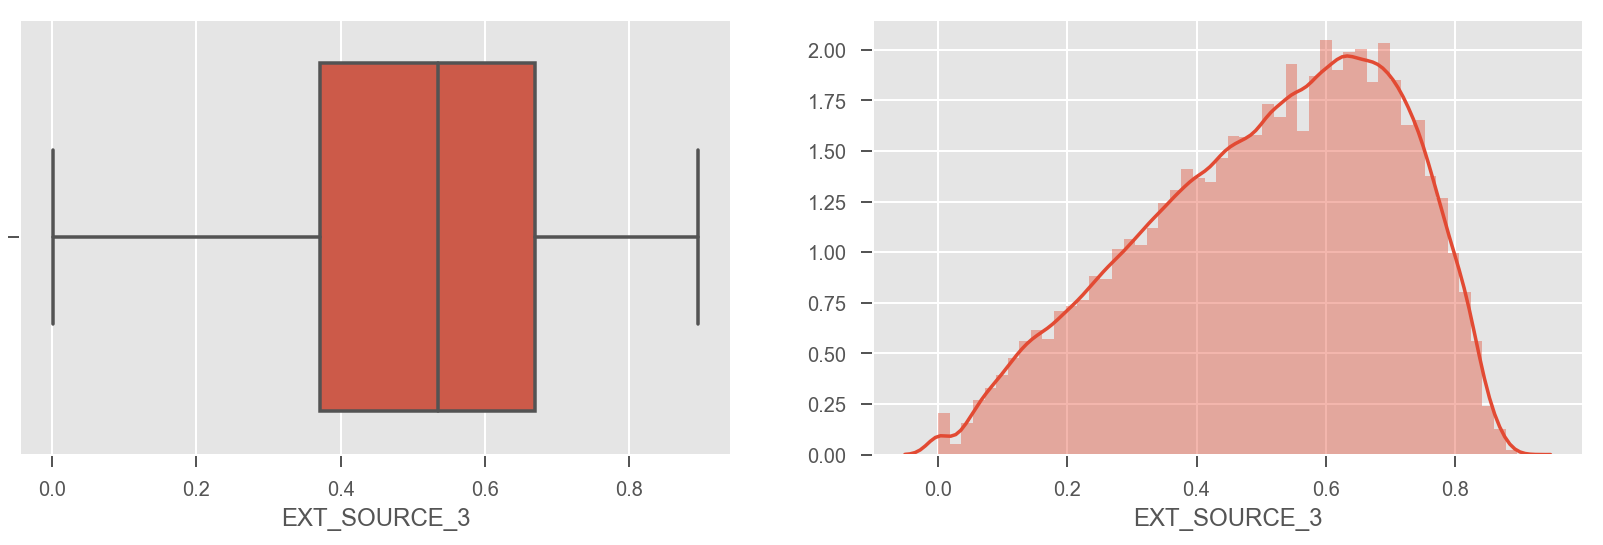

In [612]:
plot_data("EXT_SOURCE_3", application_train)

Looks Promising, even though we don't know what it really means.

```EXT_SOURCE_2: 

Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      660.000000
Percent      0.214626
Name: EXT_SOURCE_2, dtype: float64

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64```

Although 20% of its data is missing.

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


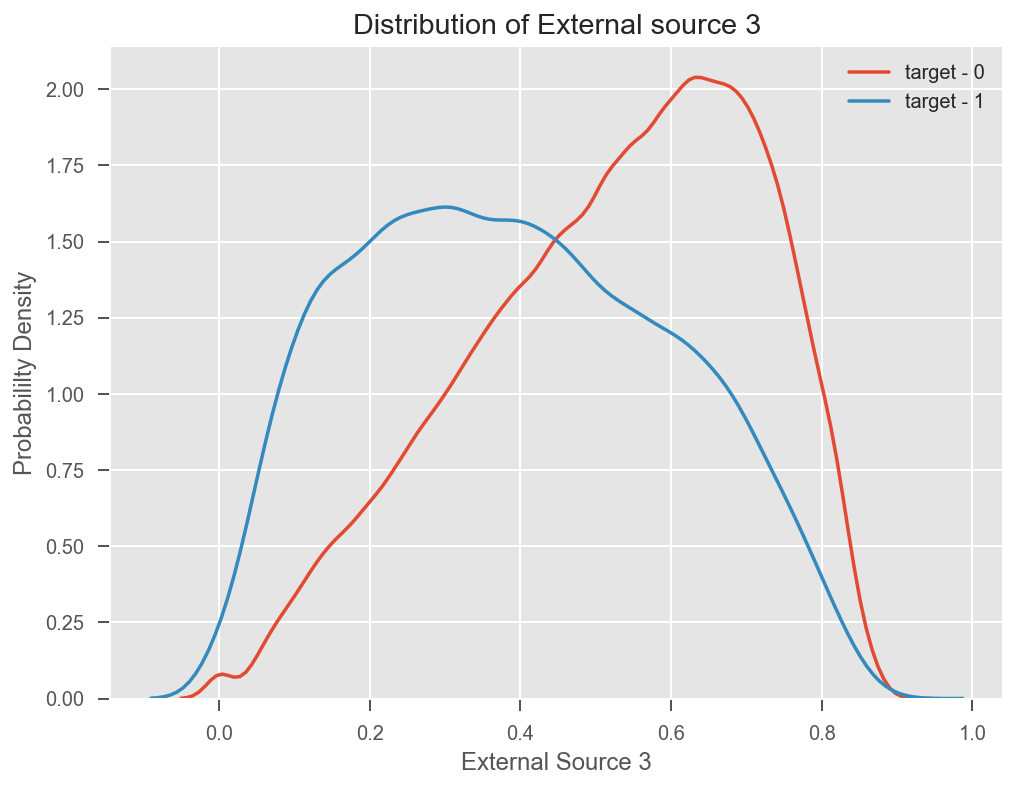

In [613]:
plt.figure(figsize = (8, 6))

sns.distplot(application_train.loc[application_train['TARGET'] == 0, 'EXT_SOURCE_3'],
             label='target - 0', hist=False)
sns.distplot(application_train.loc[application_train['TARGET'] == 1, 'EXT_SOURCE_3'],
             label = 'target - 1', hist=False)

plt.legend()
plt.xlabel('External Source 3')
plt.ylabel('Probabililty Density')
plt.title('Distribution of External source 3');

Very interesting!

## EXT_SOURCE_2

```
EXT_SOURCE_2: 

Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      660.000000
Percent      0.214626
Name: EXT_SOURCE_2, dtype: float64

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
```

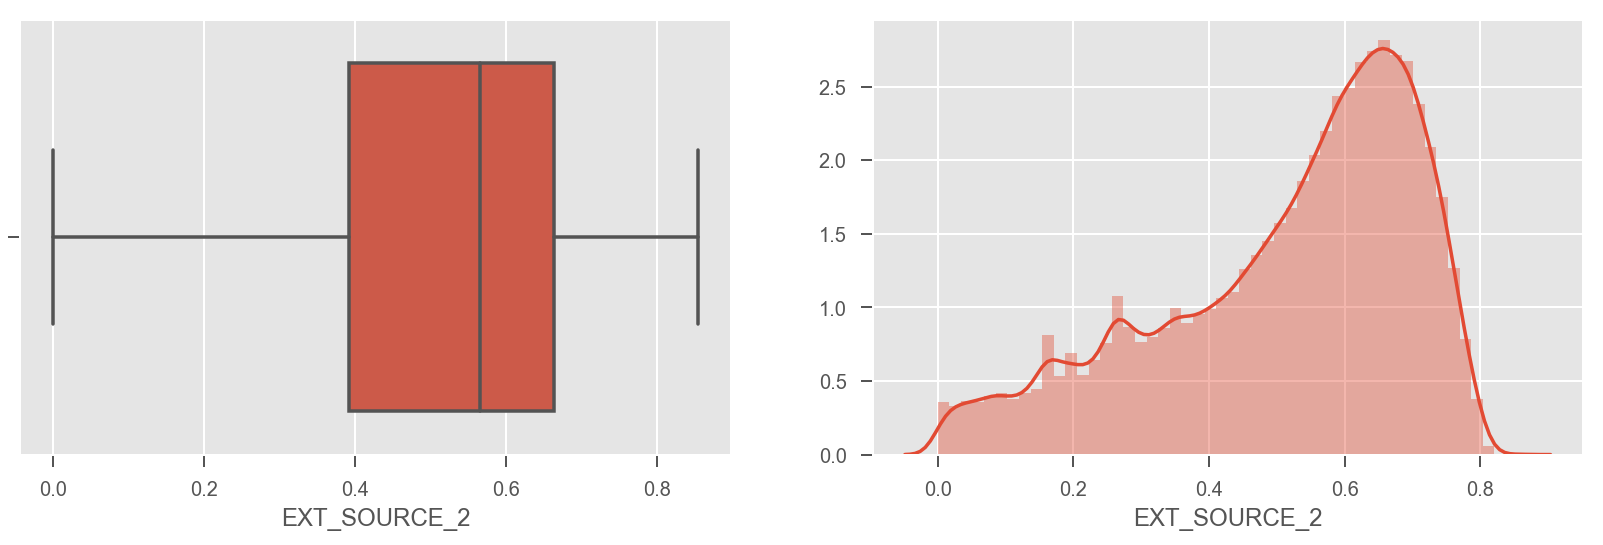

In [614]:
plot_data("EXT_SOURCE_2", application_train)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


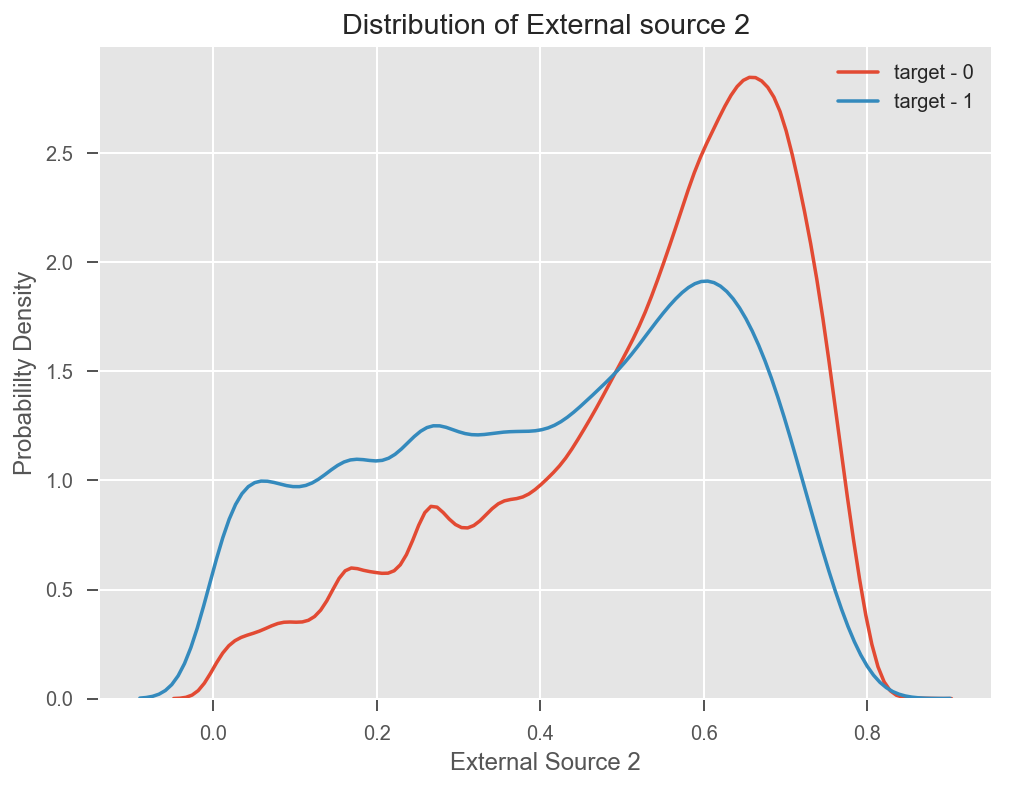

In [615]:
plt.figure(figsize = (8, 6))

sns.distplot(application_train.loc[application_train['TARGET'] == 0, 'EXT_SOURCE_2'],
             label='target - 0', hist=False)
sns.distplot(application_train.loc[application_train['TARGET'] == 1, 'EXT_SOURCE_2'],
             label = 'target - 1', hist=False)

plt.legend()
plt.xlabel('External Source 2')
plt.ylabel('Probabililty Density')
plt.title('Distribution of External source 2');

## EXT_SOURCE_1

```
Normalized score from external data source

Table: ['application_{train|test}.csv']

Missing values:
Total      173378.000000
Percent        56.381073
Name: EXT_SOURCE_1, dtype: float64

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
```

56% data are missing...

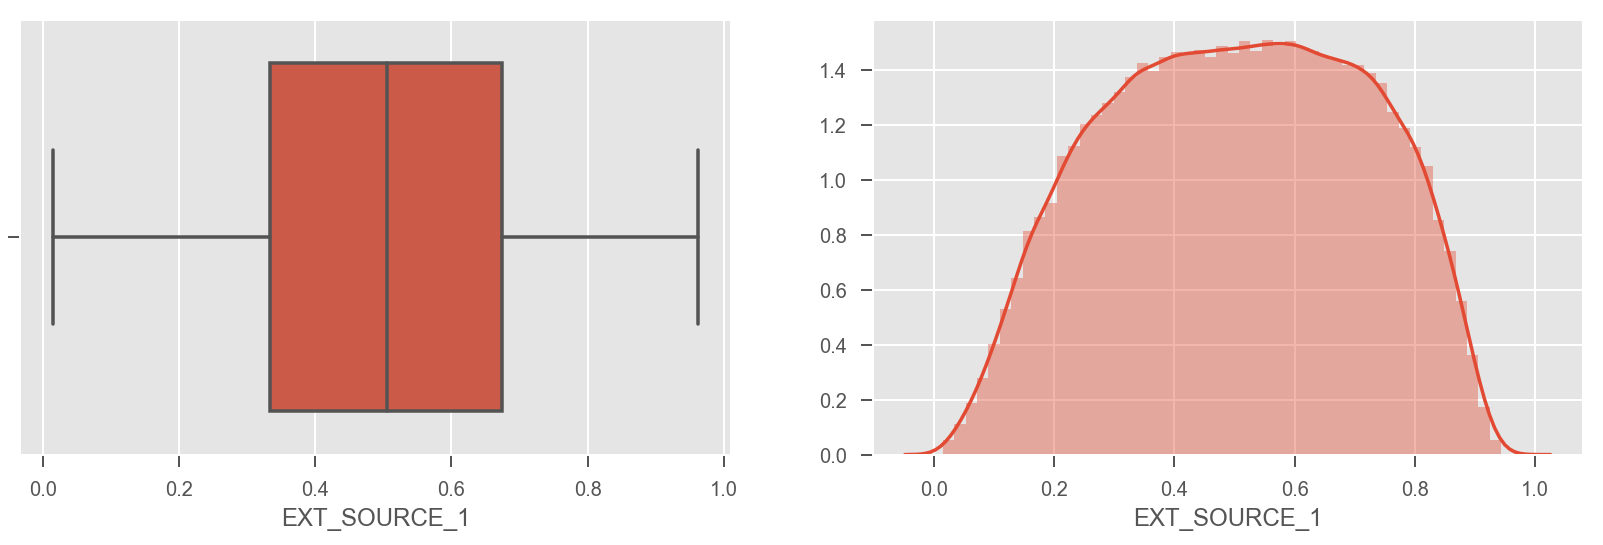

In [616]:
plot_data("EXT_SOURCE_1", application_train)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


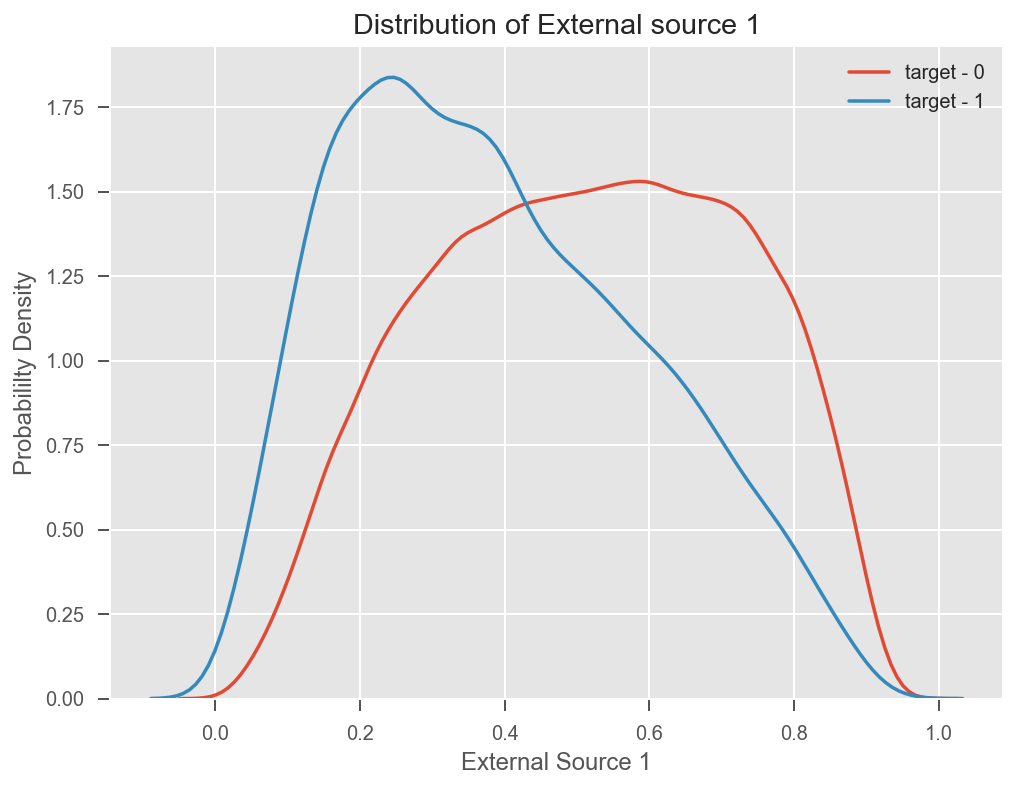

In [617]:
plt.figure(figsize = (8, 6))

sns.distplot(application_train.loc[application_train['TARGET'] == 0, 'EXT_SOURCE_1'],
             label='target - 0', hist=False)
sns.distplot(application_train.loc[application_train['TARGET'] == 1, 'EXT_SOURCE_1'],
             label = 'target - 1', hist=False)

plt.legend()
plt.xlabel('External Source 1')
plt.ylabel('Probabililty Density')
plt.title('Distribution of External source 1');

# DAYS_EMPLOYED

```
DAYS_EMPLOYED: 

How many days before the application the person started current employment

Table: ['application_{train|test}.csv']

Missing values:
Total      0.0
Percent    0.0
Name: DAYS_EMPLOYED, dtype: float64

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
```

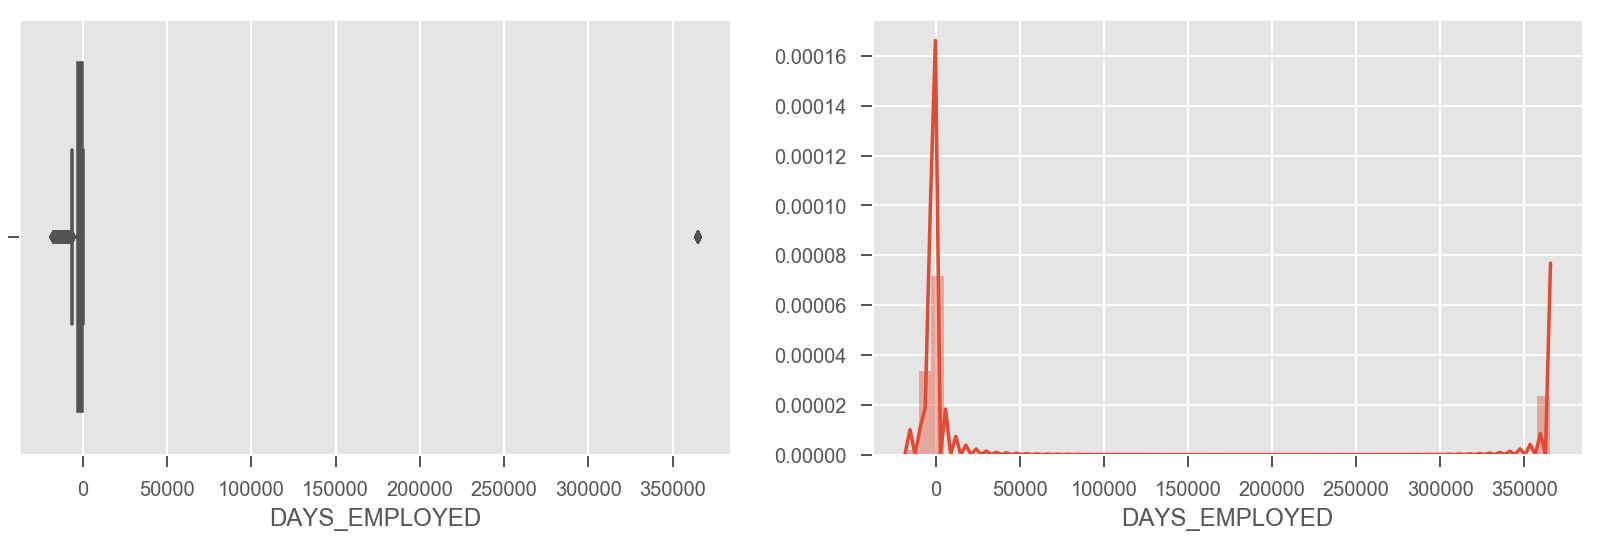

In [618]:
plot_data("DAYS_EMPLOYED", application_train)

Let's check the outliers.

In [619]:
application_train["DAYS_EMPLOYED"].value_counts()[:10]

 365243    55374
-200         156
-224         152
-199         151
-230         151
-212         150
-229         143
-384         143
-231         140
-215         138
Name: DAYS_EMPLOYED, dtype: int64

In [620]:
application_train[application_train["DAYS_EMPLOYED"]>0]["SK_ID_CURR"].count()

55374

Most values are negative, but there are 55374 rows having the same value: 365243.

I am not sure what that means...
Let's separate them into 2 categories and see if the sign can have some impact on the target.

In [621]:
neg_days_employed = application_train[application_train["DAYS_EMPLOYED"]<=0]
pos_days_employed = application_train[application_train["DAYS_EMPLOYED"]>0]

In [622]:
print(pos_days_employed.TARGET.value_counts(1))
print('\n')
print(neg_days_employed.TARGET.value_counts(1))

0    0.946004
1    0.053996
Name: TARGET, dtype: float64


0    0.9134
1    0.0866
Name: TARGET, dtype: float64


It seems that when the day employed is 365243, whatever this number is, it is more likely to be a non-default case than a default case.

However, this proportional difference looks pretty small, I doubt if they are statistically different? 

Let's review our a/b test.

In [623]:
print(scs.ttest_ind(pos_days_employed.TARGET, neg_days_employed.TARGET, equal_var=False))

Ttest_indResult(statistic=-29.323497547200667, pvalue=3.477030937526138e-188)


Actually there is a satistically difference between 2 samples porpostion regarding the default rate.

Let's plot the data.

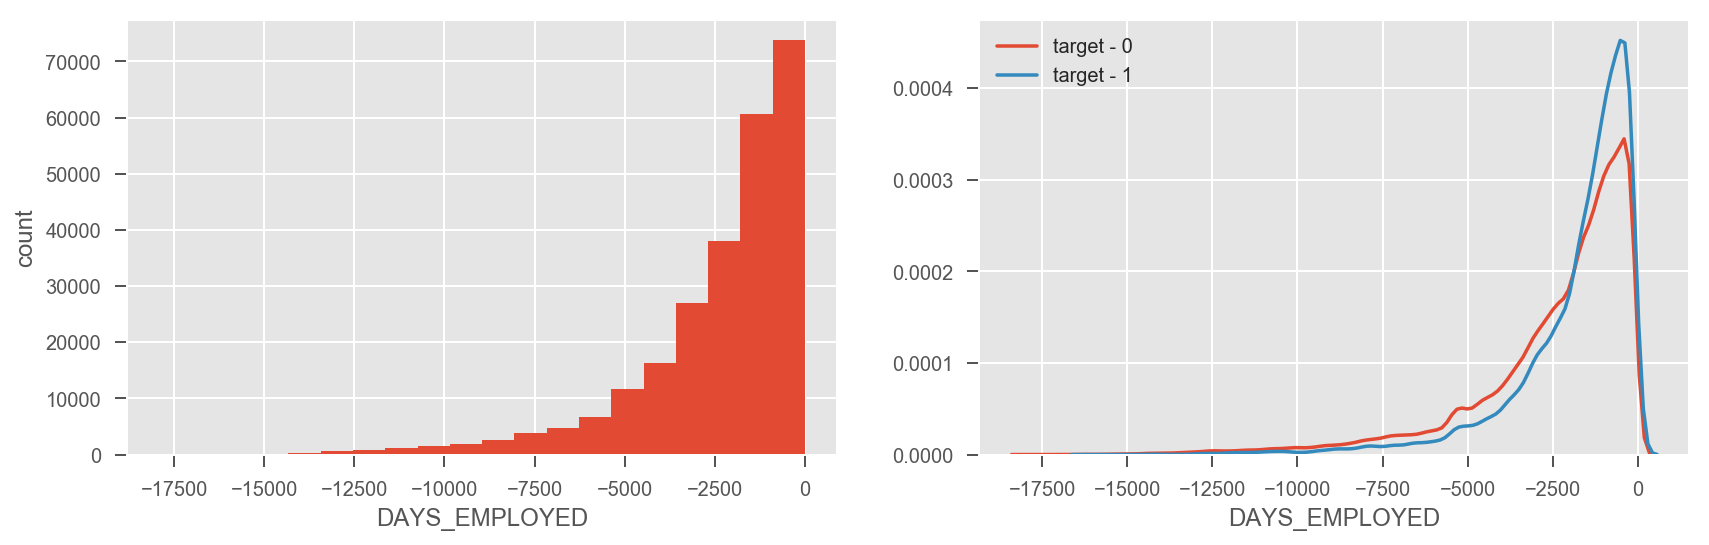

In [624]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

neg_days_employed.DAYS_EMPLOYED.hist(bins=20, ax=ax1)

sns.distplot(neg_days_employed.loc[neg_days_employed['TARGET'] == 0, 'DAYS_EMPLOYED'],
             label='target - 0', hist=False, ax=ax2)
sns.distplot(neg_days_employed.loc[neg_days_employed['TARGET'] == 1, 'DAYS_EMPLOYED'],
             label = 'target - 1', hist=False, ax=ax2);


ax1.set_xlabel('DAYS_EMPLOYED')
ax1.set_ylabel('count');


Excluding all positive number, default case happens more likely when employed days are short (from -1000 to 0).

Conclusion: we can see some signals from DAYS_EMPLOYED features no matter their value is positive or negative. So let's keep this feature in our model.

## Interaction

### EXT_SOURCE_1 &  DAYS_BIRTH
numeric vs numeric feature

Since the target is highly imbalanced, some facts might be hidden by imbalance. I try to rebalance the weight of target 0 and 1 by simpling from our application_train. 

In [637]:
application = application_train.copy() # Keep the application as it is
application.dropna(inplace=True)
application_0 = application[application["TARGET"]==0]
application_1 = application[application["TARGET"]==1]

In [638]:
# sampling 500 each so I get 1000 rows in total with equal weight of target.
sample_1_reduced = application_1.sample(500)
sample_0_reduced = application_0.sample(500)
df_sampling = pd.concat([sample_1_reduced, sample_0_reduced], axis=0)

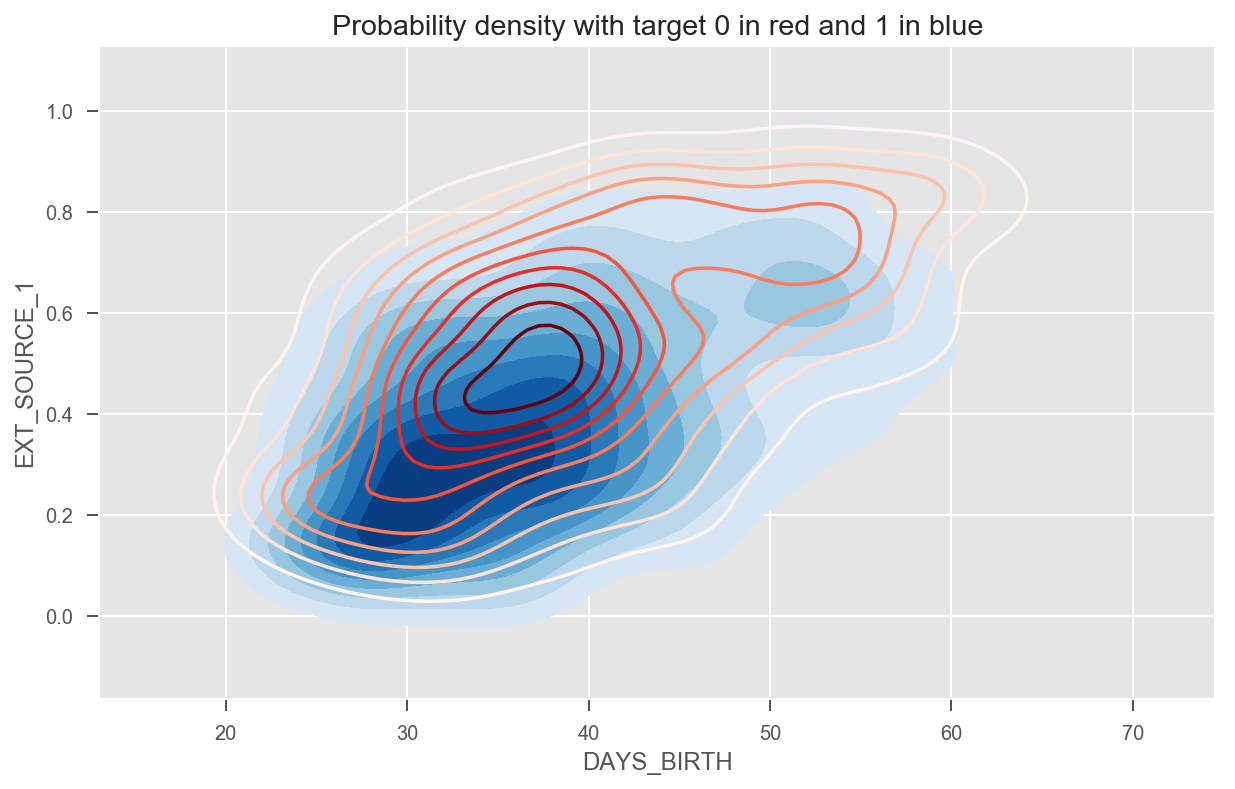

In [640]:
plt.figure(figsize=(10,6))

sns.kdeplot(sample_0_reduced.DAYS_BIRTH,
            sample_0_reduced.EXT_SOURCE_1, cmap="Reds", shade=False)
sns.kdeplot(sample_1_reduced.DAYS_BIRTH, sample_1_reduced.EXT_SOURCE_1,
            cmap="Blues",shade=True, shade_lowest=False)
plt.title('Probability density with target 0 in red and 1 in blue');
# I don't know how to make the legend work...

- Correlation between EXT_SOURCE_1 and DAYS_BIRTH
- Distribution density difference between target 0 and target 1

### EXT_SOURCE_1 & REGION_RATING_CLIENT_W_CITY
numeric vs categorical feature

In [641]:
sample_1_reduced = application_1.sample(50)
sample_0_reduced = application_0.sample(50)
df_sampling = pd.concat([sample_1_reduced, sample_0_reduced], axis=0)

To make the scatter plot more readable, (too many dots could lay over each other), I only sample 50 from each target label.

In [642]:
df_sampling.shape

(100, 122)

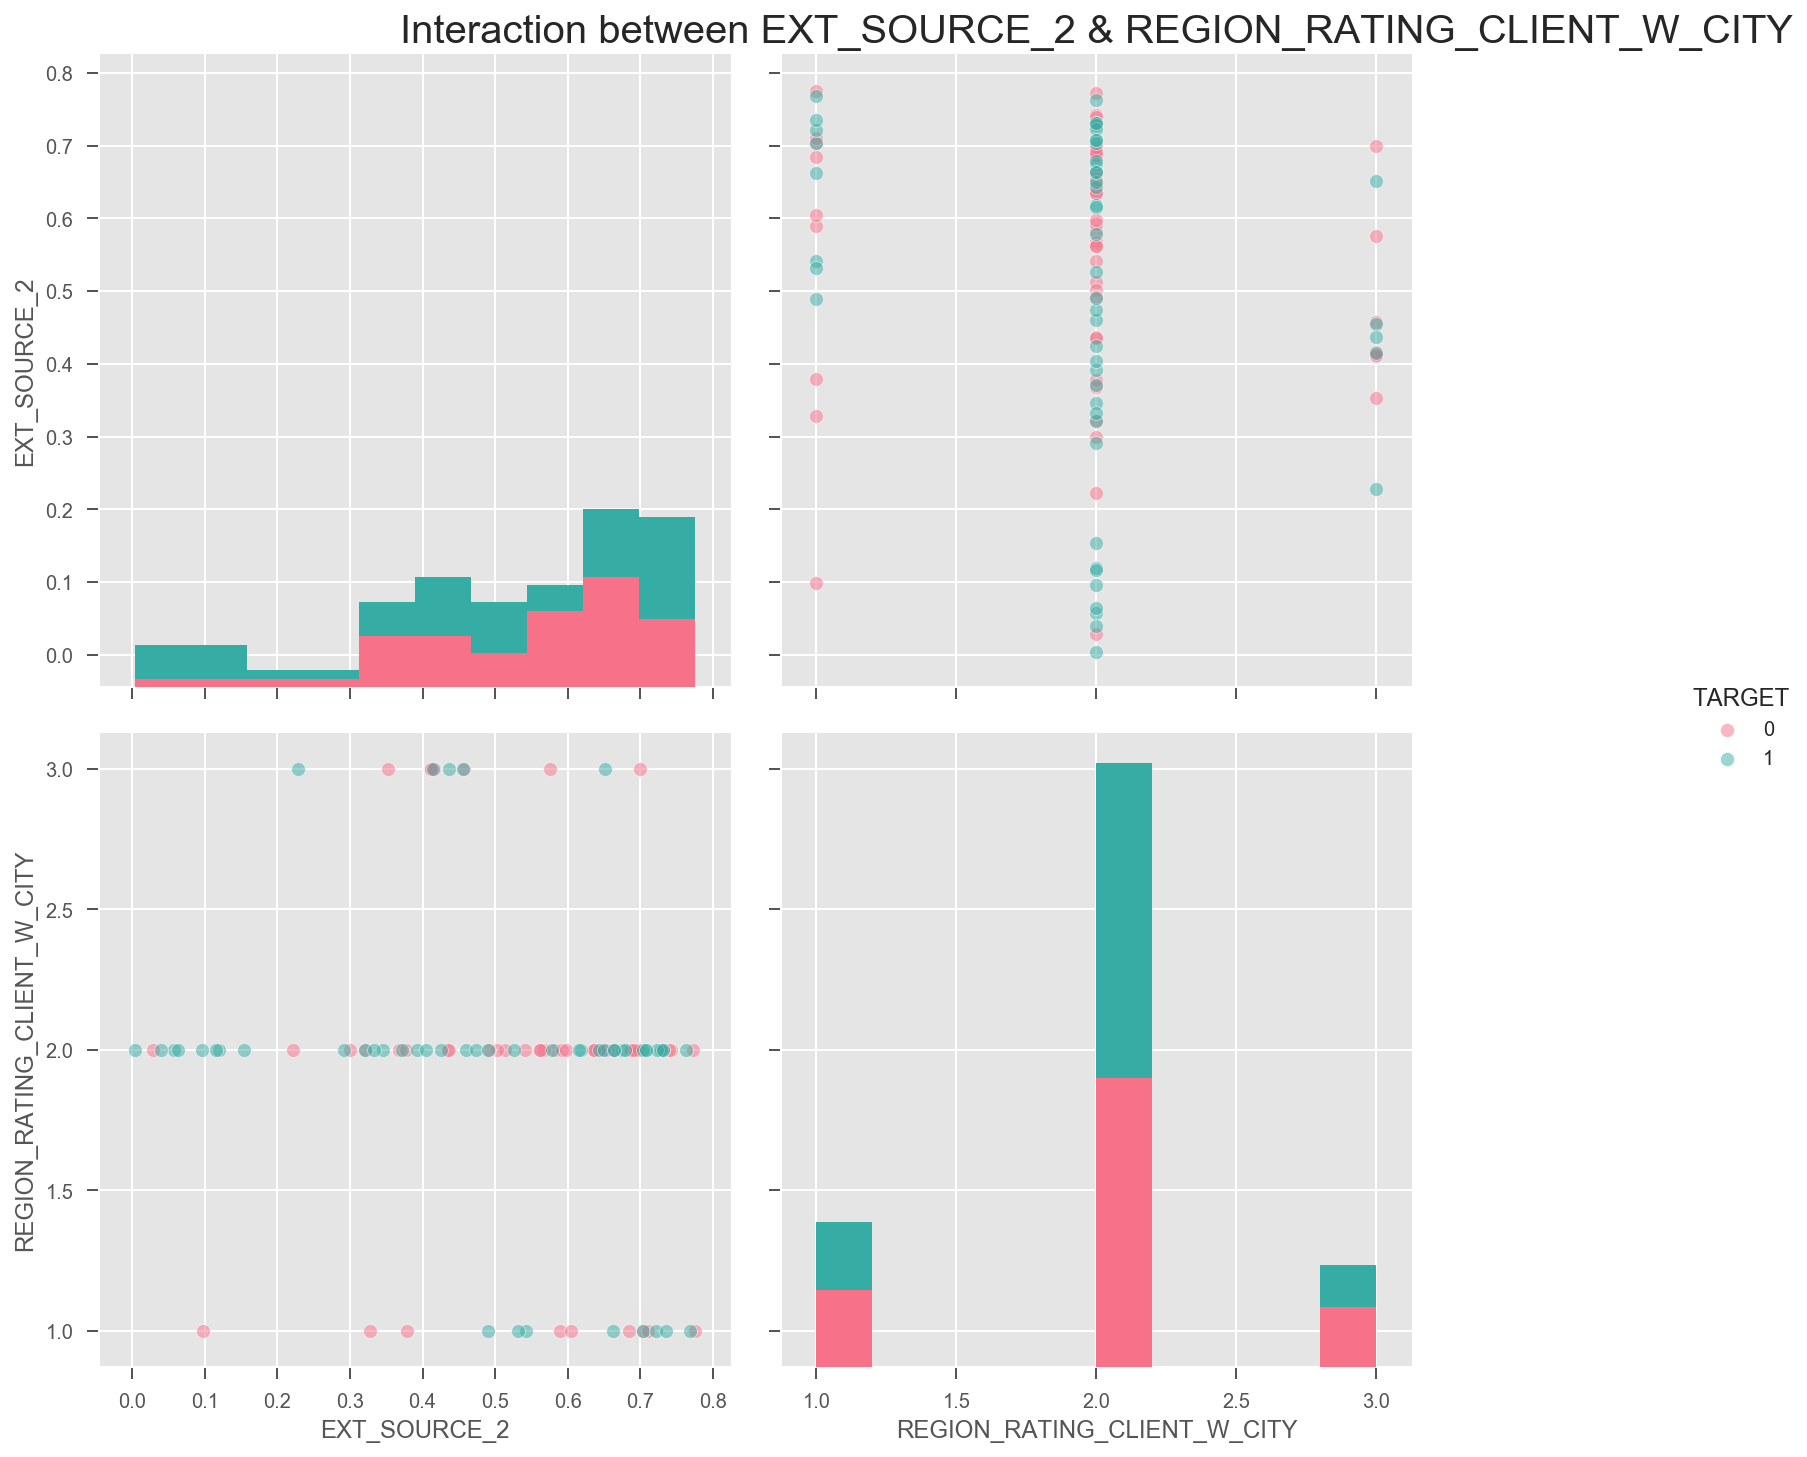

In [643]:
sns.pairplot(df_sampling, hue='TARGET',
             vars=['EXT_SOURCE_2','REGION_RATING_CLIENT_W_CITY'],
                       size=5, palette="husl", plot_kws={'alpha':0.5});
plt.title('Interaction between EXT_SOURCE_2 & REGION_RATING_CLIENT_W_CITY',
          {'fontsize': 20});

Copie from previous table:
```
TARGET   pct_0	   pct_1
REGION_RATING_CLIENT_W_CITY				
1		0.115015	0.066626
2		0.747522	0.731923
3		0.137463	0.201450
```

The above table shows that given someone already default on repayment, he is more likely to be given a rating score 1 rather than a rating score 3 regarding the region he lives. Meanwhile plotting (bottom-left) from evenly balanced DataFrame makes this assumption more obvious. 

# Logistic regression model

In [644]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc
from sklearn.preprocessing import PolynomialFeatures, Imputer, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from roc_curve import roc_curve # customized function for plotting pupurse

In [645]:
df_train_1 = application_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY',
                              'DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
df_train_1['REGION_RATING_CLIENT_W_CITY'] = pd.get_dummies(df_train_1['REGION_RATING_CLIENT_W_CITY'],
                                                           drop_first=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [650]:
df_train_1.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,25.920548,1,-637,0.083037,0.262949,0.139376
1,0,45.931507,0,-1188,0.311267,0.622246,NaN
2,0,52.180822,1,-225,NaN,0.555912,0.729567
3,0,52.068493,1,-3039,NaN,0.650442,NaN
4,0,54.608219,1,-3038,NaN,0.322738,NaN


In [647]:
imp = Imputer(strategy='median') 
imp.fit(X_train) 
X_train=imp.transform(X_train)
X_test=imp.transform(X_test)

In [ ]:
# poly = PolynomialFeatures(2)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)

In [668]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# probabilities = model.predict_proba(X_test)[:, 1]
# tpr, fpr, thresholds = roc_curve(probabilities, y_test)
# plt.plot(fpr, tpr)
# plt.xlabel("False Positive Rate (1 - Specificity)")
# plt.ylabel("True Positive Rate (Sensitivity, Recall)")
# plt.title("ROC plot of admissions data")
# plt.show()

## Cross Validation

In [649]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

accuracies = []
precisions = []
recalls = []

for train_index, test_index in kf.split(X_train):
    model = LogisticRegression()
    model.fit(X_train[train_index], y_train[train_index])
#     proba = model.predict_proba(X_train[test_index])[:, 1]
#     y_predict = proba>=0.15
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))
    
print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy: 0.919191960118
precision: 0.0
recall: 0.0


In [651]:
df_train_1.head()

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,1,25.920548,1,-637,0.083037,0.262949,0.139376
1,0,45.931507,0,-1188,0.311267,0.622246,NaN
2,0,52.180822,1,-225,NaN,0.555912,0.729567
3,0,52.068493,1,-3039,NaN,0.650442,NaN
4,0,54.608219,1,-3038,NaN,0.322738,NaN


In [652]:
df_train_2 = application_train[['TARGET','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY',
                              'DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]
df_train_2['REGION_RATING_CLIENT_W_CITY'] = pd.get_dummies(df_train_2['REGION_RATING_CLIENT_W_CITY'],
                                                           drop_first=True)
df_train_2['Days_div_source_1'] = df_train_2['DAYS_BIRTH']/df_train_2['DAYS_BIRTH']
df_train_2['Days_div_employed'] = df_train_2['DAYS_BIRTH']/df_train_2['DAYS_EMPLOYED']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [653]:
X = df_train_2.drop('TARGET', axis=1).values
y = df_train_2['TARGET'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)
imp = Imputer(strategy='median') 
imp.fit(X_train) 
X_train=imp.transform(X_train)
X_test=imp.transform(X_test)

In [666]:
np.isnan(X_train).sum()

0

In [667]:
print(X_test.shape)
print(X_train.shape)

(76878, 8)
(230633, 8)


In [665]:
model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]
tpr, fpr, thresholds = roc_curve(probabilities, y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of admissions data")
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [655]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)

accuracies = []
precisions = []
recalls = []

for train_index, test_index in kf.split(X_train):
    model = LogisticRegression()
    model.fit(X_train[train_index], y_train[train_index])
#     proba = model.predict_proba(X_train[test_index])[:, 1]
#     y_predict = proba>=0.15
    y_predict = model.predict(X_train[test_index])
    y_true = y_train[test_index]
    accuracies.append(accuracy_score(y_true, y_predict))
    precisions.append(precision_score(y_true, y_predict))
    recalls.append(recall_score(y_true, y_predict))
    
print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Model evaluation